### Use power method to find the largest eigenvalue and the corresponding eigenvector of the matrices:
$$\begin{bmatrix} 0 & 2 \\ 2 & 3\end{bmatrix}$$

$$\begin{bmatrix} -4 & 14 & 0 \\ -5 & 13 & 0 \\ -1 & 0 & 2 \end{bmatrix}$$


In [1]:
import numpy as np

In [3]:
def Power_Method(matrix, initial=np.array([[1], [1]]), epsilon=0.000001, iterations=100):
    initial = initial
    for i in range(1000):
        old_x = initial
        it = matrix @ old_x
        lam = np.max(it)
        x = it / lam
        initial = x
        # print("Iteration:", i+1, "\nLambda:", lam, "\nX:", x.reshape(1, -1))
        if np.linalg.norm(initial - old_x) < 0.000001:
            print("No. of Iterations =", i+1)
            break
    return (round(lam, 2), np.around(a=initial, decimals=3).reshape(1, -1))

In [11]:
A = np.array([[0, 2], [2, 3]])
x = np.array([[1], [1]])
eig_val, eig_vect = Power_Method(matrix=A)
print("EigenValue:", eig_val, "\nEigenVector:", eig_vect)

No. of Iterations = 11
EigenValue: 4.0 
EigenVector: [[0.5 1. ]]


In [12]:
A = np.array([[-4,14,0],
              [-5,13,0],
              [-1,0,2]])
epsilon = 0.00001
initial = np.ones(A.shape[1]).reshape(-1, 1)
eig_val, eig_vect = Power_Method(matrix=A, initial=initial, epsilon=epsilon)
print("EigenValue:", eig_val, "\nEigenVector:", eig_vect)

No. of Iterations = 19
EigenValue: 6.0 
EigenVector: [[ 1.     0.714 -0.25 ]]


## PageRank Algorithm
### Use the power method to find the rank of each node in the following graph:
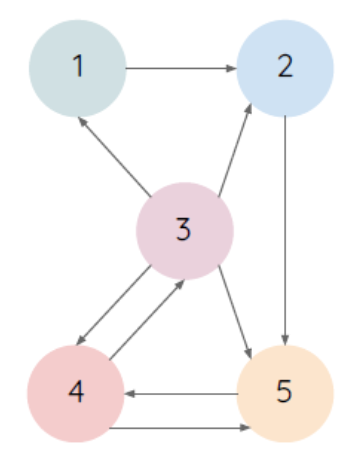

In [4]:
R = np.array([[0,0,.25,0,0],
             [1,0,.25,0,0],
             [0,0,0,.5,0],
             [0,0,.25,0,1],
             [0,1,.25,.5,0]])

x = [[.2],[.2],[.2],[.2],[.2]]
epsilon = 0.00001
eig_val, eig_vect = Power_Method(matrix=R, initial=x, epsilon=epsilon)
eig_vect

No. of Iterations = 35


array([[0.125, 0.25 , 0.5  , 1.   , 0.875]])

In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame(eig_vect.reshape(-1, 1), columns=['Rank'])
df['Node'] = (df['Rank'].index) + 1
df = df.sort_values(by='Rank', ascending=False)
df

,Rank,Node
3,1.000,4
4,0.875,5
2,0.500,3
1,0.250,2
0,0.125,1


## Singular Value Decomposition SVD

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

In [36]:
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)

Unit circle:


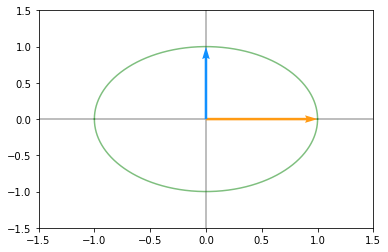

Unit circle transformed by A:


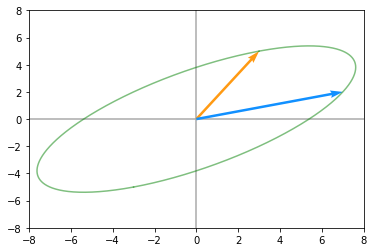

In [37]:
A = np.array([[3, 7], [5, 2]])

print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [38]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

In [39]:
D

array([8.71337969, 3.32821489])

In [40]:
V

array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

Unit circle:


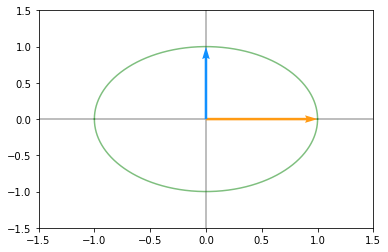

First rotation:


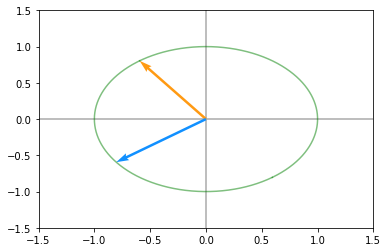

Scaling:


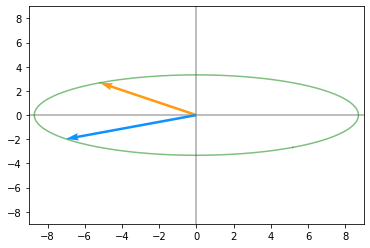

Second rotation:


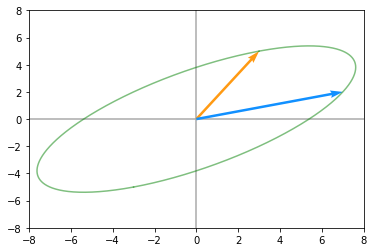

In [41]:
# Unit circle
print ('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print ('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print ('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

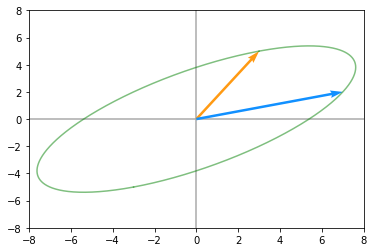

In [42]:
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## Singular values interpretation
- The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector (u1) and its norm will be the first singular value (σ1).
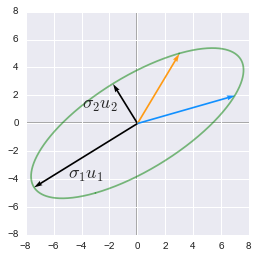

## SVD and eigendecomposition
- Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.
- The matrices U, D and V (V here is the right singular vectors i.e. V transpose from SVD point of view) can be found by transforming A in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtain by multiplying the matrix A by its transpose in one way or the other:
    - U  corresponds to the eigenvectors of A @ A.T
    - V  corresponds to the eigenvectors of A.T @ A
    - D  corresponds to the square root of eigenvalues A @ A.T or A.T @ A which are the same.

### Find SVD for the matrix A:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [76]:
A = np.array([[7, 2], [3, 4], [5, 3]])
A

array([[7, 2],
       [3, 4],
       [5, 3]])

In [77]:
U, D, Vt = np.linalg.svd(A)

In [78]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [79]:
D

array([10.25142677,  2.62835484])

In [80]:
Vt

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

### Find the eigenvectors for A @ A.T and compare with the U obtained from SVD.

In [85]:
# The left-singular values
print("A @ At:\n", np.linalg.eig(A @ np.transpose(A))[1])
print("U:\n", U)

A @ At:
 [[-0.69366543 -0.59343205 -0.40824829]
 [-0.4427092   0.79833696 -0.40824829]
 [-0.56818732  0.10245245  0.81649658]]
U:
 [[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]


### Find the eigenvectors for  A.T @ A and compare with the V obtained from SVD.

In [87]:
# The right-singular values
print("At @ A:\n", np.linalg.eig(np.transpose(A) @ A)[1])
print("Vt:\n", Vt)

At @ A:
 [[ 0.88033817 -0.47434662]
 [ 0.47434662  0.88033817]]
Vt:
 [[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


### Find the square root of the eigenvalues for A @ A.T or  A.T @ A and compare with D obtained from SVD

In [89]:
# The nonzero singular values
print("A @ At:\n", np.sqrt(np.linalg.eig(A @ np.transpose(A))[0]))
print("At @ A:\n", np.sqrt(np.linalg.eig(np.transpose(A) @ A)[0]))
print("D:\n", D)

A @ At:
 [10.25142677  2.62835484         nan]
At @ A:
 [10.25142677  2.62835484]
D:
 [10.25142677  2.62835484]


C:\Users\Muhammad\AppData\Local\Temp/ipykernel_10428/535758570.py:2: RuntimeWarning: invalid value encountered in sqrt
  print("A @ At:\n", np.sqrt(np.linalg.eig(A @ np.transpose(A))[0]))


### Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

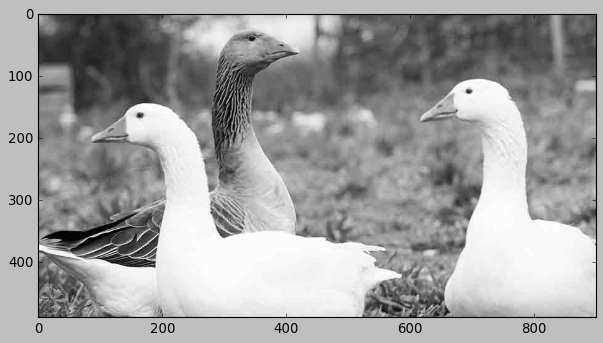

In [50]:
from PIL import Image

plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the shape of the matrices (imgmat, U, D, and V)

In [70]:
U, D, Vt = np.linalg.svd(imgmat)

In [71]:
imgmat.shape

(488, 900)

In [72]:
U.shape

(488, 488)

In [73]:
D.shape

(488,)

In [74]:
Vt.shape

(900, 900)

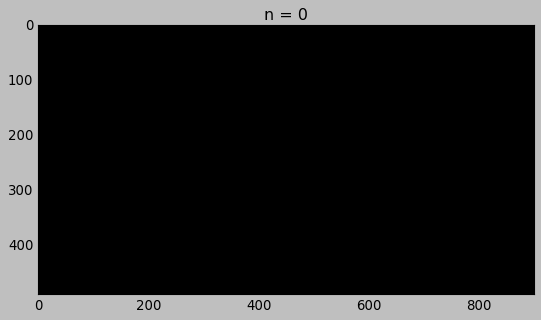

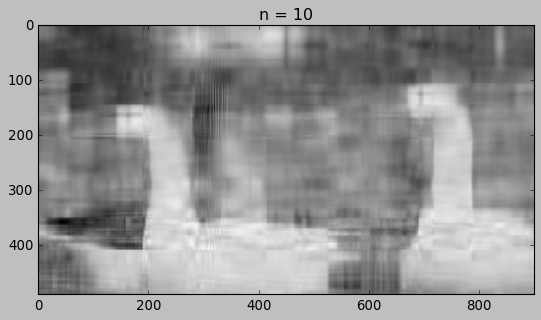

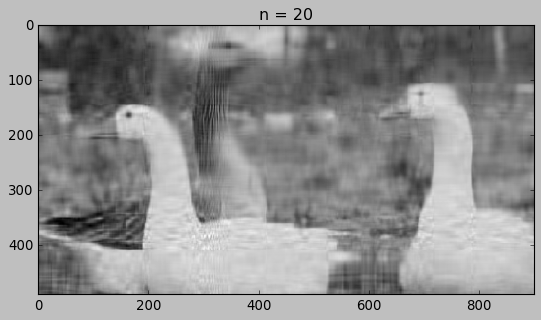

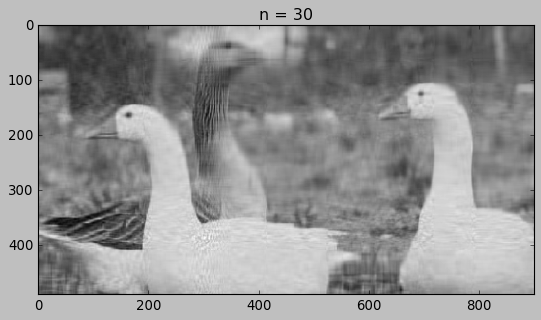

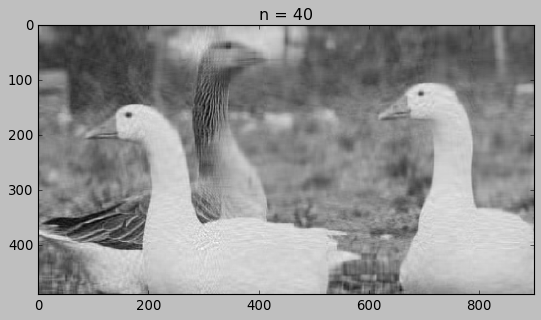

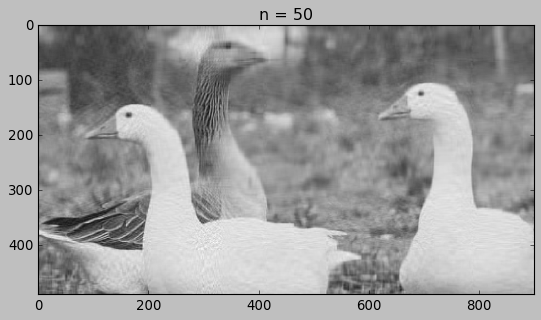

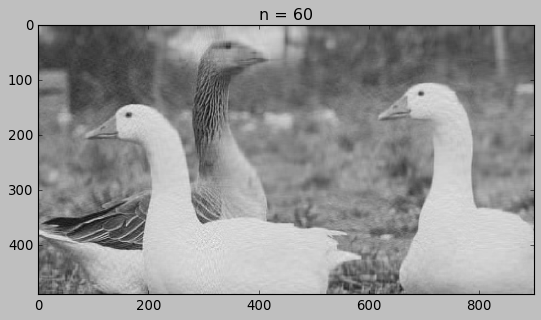

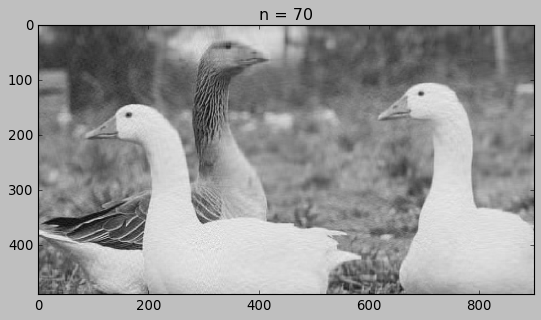

In [75]:
for i in range(0, 80, 10):
    reconstimg = U @ np.diag(D)[:, :i] @ Vt[:i, :]
    plt.imshow(reconstimg, cmap='gray')
    title = "n = {}".format(i)
    plt.title(title)
    plt.show()

### Remember that D are the singular values that need to be put into a diagonal matrix. Also, V doesn’t need to be transposed 

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components
### Try reconstruct the image from higher number of principal components and see the difference

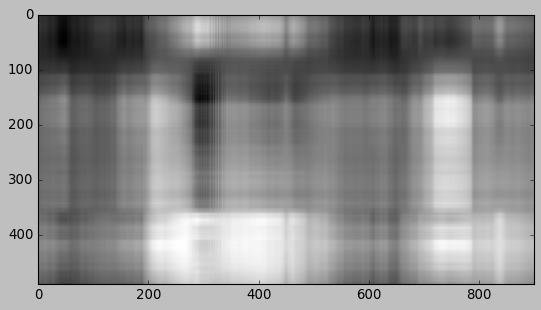

In [122]:
# PCs=2

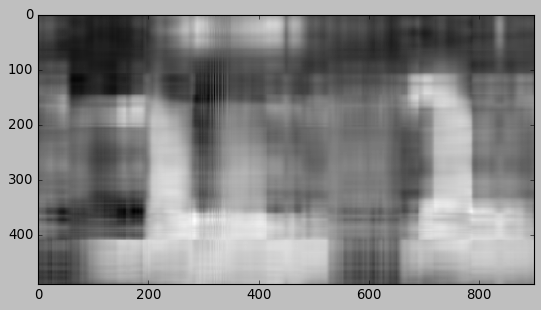

In [123]:
# PCs=5

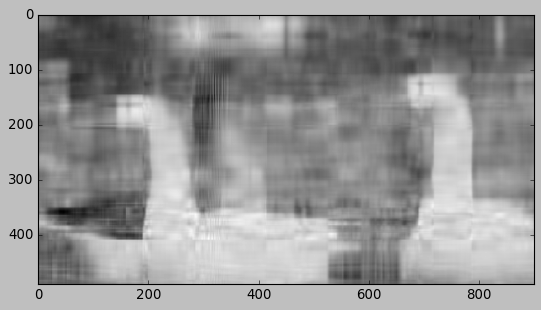

In [124]:
# PCs=10

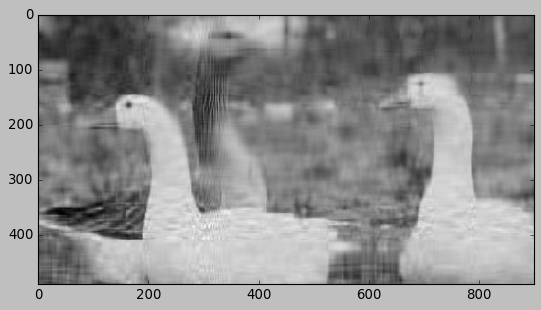

In [125]:
# PCs=20

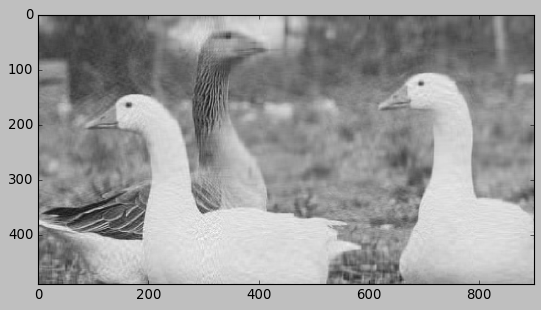

In [126]:
# PCs=50

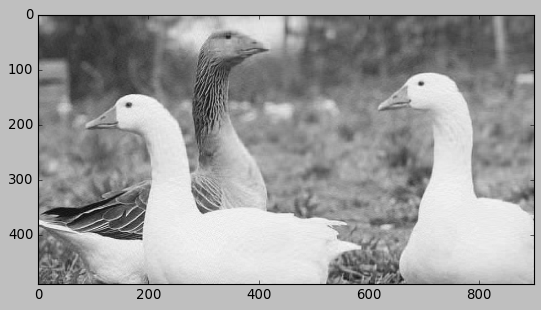

In [127]:
# PCs=100

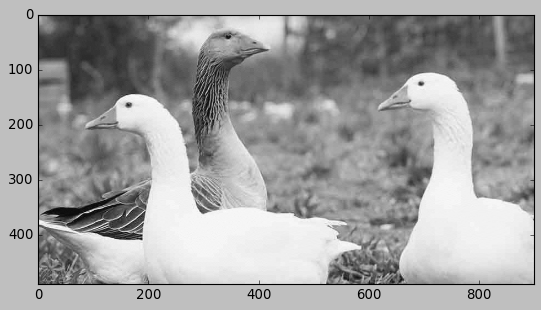

In [128]:
# PCs=200

## The Moore Penrose Pseudoinverse

### Find SVD for the matrix A then find it's Pseeudoinverse:
$$\begin{bmatrix} 7 & 2 \\ 3 & 4 \\ 5 & 3 \end{bmatrix}$$

In [33]:
A = np.array([[7, 2], [3, 4], [5, 3]])
A

array([[7, 2],
       [3, 4],
       [5, 3]])

In [8]:
U, D, Vt = np.linalg.svd(A)
print("U:\n", U)
print("D:\n", D)
print("Vt:\n", Vt)

U:
 [[-0.69366543  0.59343205 -0.40824829]
 [-0.4427092  -0.79833696 -0.40824829]
 [-0.56818732 -0.10245245  0.81649658]]
D:
 [10.25142677  2.62835484]
Vt:
 [[-0.88033817 -0.47434662]
 [ 0.47434662 -0.88033817]]


In [21]:
D = np.reciprocal(D)
print(D)
Dplus = np.column_stack((np.diag(D), np.zeros(2)))
Dplus

[0.0975474  0.38046613]


array([[0.0975474 , 0.        , 0.        ],
       [0.        , 0.38046613, 0.        ]])

In [24]:
A_plus = np.transpose(Vt) @ Dplus @ np.transpose(U)
np.around(a=A_plus, decimals=4)

array([[ 0.1667, -0.1061,  0.0303],
       [-0.1667,  0.2879,  0.0606]])

In [34]:
def Pseudo_Inverse(A):
    U, D, Vt = np.linalg.svd(A)
    D = np.reciprocal(D)
    Dplus = np.column_stack((np.diag(D), np.zeros(2)))
    A_plus = np.transpose(Vt) @ Dplus @ np.transpose(U)
    return A_plus

In [35]:
Pseudo_Inverse(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Use np.linalg.pinv(A) and compare the results

In [25]:
np.linalg.pinv(A)

array([[ 0.16666667, -0.10606061,  0.03030303],
       [-0.16666667,  0.28787879,  0.06060606]])

### Multiply A+ and  A. See if the result is close to the Identity matrix

In [29]:
A_plus @ A

array([[1.00000000e+00, 2.70616862e-16],
       [2.28983499e-16, 1.00000000e+00]])

### Multiply A and A+. Notice the result
- A difference with the real inverse is that A+ @ A is approximate I. However A @ A+ is not

In [31]:
A @ A_plus

array([[ 0.83333333, -0.16666667,  0.33333333],
       [-0.16666667,  0.83333333,  0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333]])

### Using the pseudoinverse to solve a overdetermined system of linear equations
- In general there is no solution to overdetermined systems.
- In the following picture, there is no point at the intersection of the three lines corresponding to three equations:
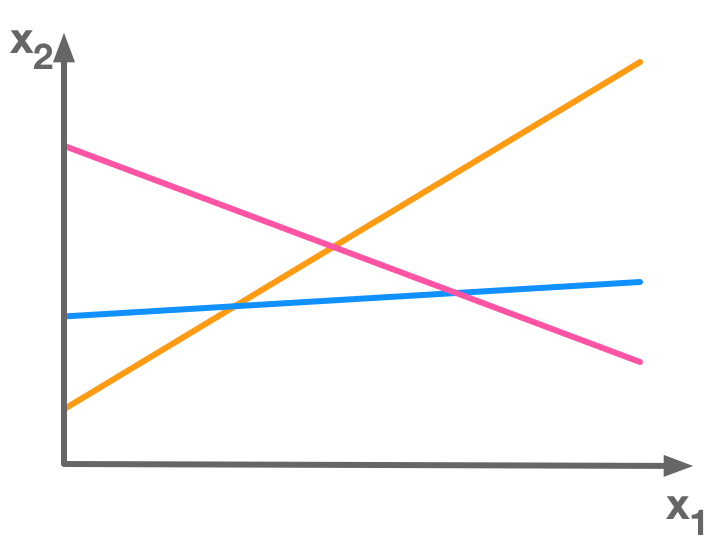

### Use pseudoinverse to find the approximate solution of the following system of linear equations:
#### -2x1 - x2 = -2 , 4x1 - x2 = -8 , -x1 - x2 =-2

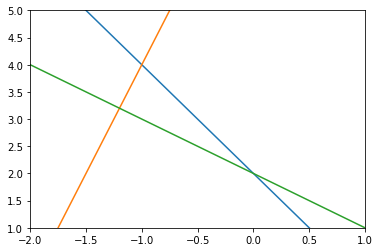

In [38]:
x1 = np.linspace(-5, 5, 1000)
x2_1 = -2*x1 + 2
x2_2 = 4*x1 + 8
x2_3 = -1*x1 + 2

plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)
plt.show()

In [44]:
A = np.array([[-2, -1], [4, -1], [-1, -1]])
Y = np.array([[-2], [-8], [-2]])
A

array([[-2, -1],
       [ 4, -1],
       [-1, -1]])

In [43]:
A_plus = Pseudo_Inverse(A)
A_plus

array([[-0.11290323,  0.17741935, -0.06451613],
       [-0.37096774, -0.27419355, -0.35483871]])

In [45]:
res = A_plus @ Y
res

array([[-1.06451613],
       [ 3.64516129]])

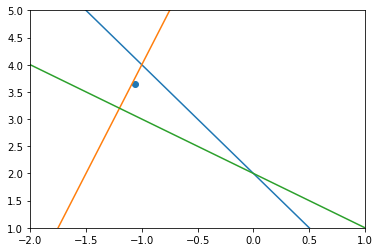

In [46]:
plt.plot(x1, x2_1)
plt.plot(x1, x2_2)
plt.plot(x1, x2_3)
plt.xlim(-2., 1)
plt.ylim(1, 5)

plt.scatter(res[0], res[1])

plt.show()

## Bisection Method
- Implement the <b>bisection method</b> as a function and solve the following equations:
    - 𝒇(𝒙)=𝒙^𝟑−𝒙−𝟐,          𝒙∈[𝟏,𝟐]
    - 𝒇(𝒙)=𝒙^2−𝟐,          𝒙∈[0,𝟐]
- Draw both functions and check out the roots.
- Try your function in another intervals and check out the results.

In [47]:
def Bisection_Method(func, a, b, tolerance=0.0001):
    
    for i in range(20):
        c_old = (a + b)/2
        if (np.sign(func(c_old)) == np.sign(func(a))):
            a = c_old
        else: #(np.sign(f(c)) == np.sign(f(b))):
            b = c_old
        print("Iteration #{}:   Root --> {}".format(i+1, c_old))
        # err = abs(a-b)
        err = (b-a)/2
        if (err <= tolerance):
            # print("r01 =", a, "\nr1 =", b, "\nf(r01) =", func(a), "\nf(r1) =", func(b))
            break

In [48]:
def f1(x):
    return (x**3 - x - 2)
Bisection_Method(func=f1, a=1, b=2)

Iteration #1:   Root --> 1.5
Iteration #2:   Root --> 1.75
Iteration #3:   Root --> 1.625
Iteration #4:   Root --> 1.5625
Iteration #5:   Root --> 1.53125
Iteration #6:   Root --> 1.515625
Iteration #7:   Root --> 1.5234375
Iteration #8:   Root --> 1.51953125
Iteration #9:   Root --> 1.521484375
Iteration #10:   Root --> 1.5205078125
Iteration #11:   Root --> 1.52099609375
Iteration #12:   Root --> 1.521240234375
Iteration #13:   Root --> 1.5213623046875


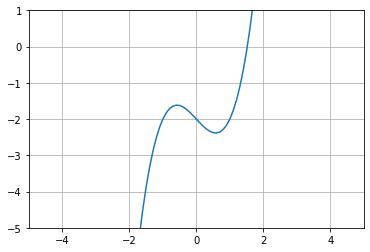

In [49]:
X = []
Y = []
for i in np.arange(-2, 2, 0.1):
    X.append(i)
    Y.append(f1(i))
plt.xlim(-5, 5)
plt.ylim(-5, 1)
plt.grid()
plt.plot(X, Y)

In [50]:
def f2(x):
    return (x**2 - 2)
Bisection_Method(func=f2, a=0, b=2)

Iteration #1:   Root --> 1.0
Iteration #2:   Root --> 1.5
Iteration #3:   Root --> 1.25
Iteration #4:   Root --> 1.375
Iteration #5:   Root --> 1.4375
Iteration #6:   Root --> 1.40625
Iteration #7:   Root --> 1.421875
Iteration #8:   Root --> 1.4140625
Iteration #9:   Root --> 1.41796875
Iteration #10:   Root --> 1.416015625
Iteration #11:   Root --> 1.4150390625
Iteration #12:   Root --> 1.41455078125
Iteration #13:   Root --> 1.414306640625
Iteration #14:   Root --> 1.4141845703125


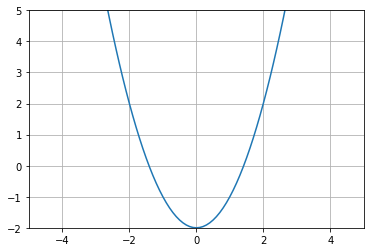

In [51]:
X = []
Y = []
for i in np.arange(-3, 3, 0.1):
    X.append(i)
    Y.append(f2(i))
plt.xlim(-5, 5)
plt.ylim(-2, 5)
plt.grid()
plt.plot(X, Y)

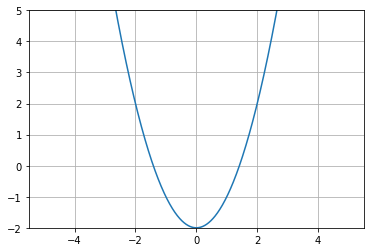

(-5.0, 1.0)

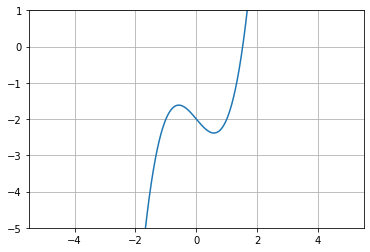

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375


r1 = 1.53125
r01 = 1.521484375
f(r1) = 0.059112548828125
f(r01) = 0.0006221756339073181


Exception: The scalars a and b do not bound a root

## Fixed Point Iteration Method
- Implement the <b>Newton's method</b> as a function and solve the following equations:
    - $f(x) = x^2 - x - 1 = 0$
    - $𝒇(𝒙)=𝒙−𝒔𝒊𝒏(𝒙)−𝟎.𝟓$
- Draw the functions and check out the roots.
- Draw g(x).
- Try your function with different initialization and check out the results..

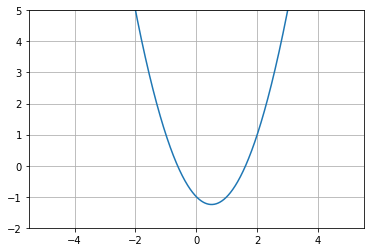

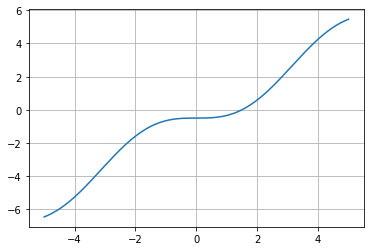

In [48]:
! pip install prettytable 

+-----+--------------------+--------------------+------------------------+
| Itr |         Pn         |        Pn+1        |      |Pn+1 - Pn|       |
+-----+--------------------+--------------------+------------------------+
|  1  |        1.0         | 1.4142135623730951 |  0.41421356237309515   |
|  2  | 1.4142135623730951 | 1.5537739740300374 |  0.13956041165694222   |
|  3  | 1.5537739740300374 | 1.5980531824786175 |  0.04427920844858013   |
|  4  | 1.5980531824786175 | 1.6118477541252516 |  0.013794571646634113  |
|  5  | 1.6118477541252516 | 1.616121206508117  | 0.0042734523828653614  |
|  6  | 1.616121206508117  | 1.6174427985273905 | 0.0013215920192735098  |
|  7  | 1.6174427985273905 | 1.617851290609675  | 0.00040849208228443956 |
+-----+--------------------+--------------------+------------------------+
r = 1.617851290609675 
f(r1) = -0.00040849208228399547



<ipython-input-75-48f22d13494f>:2: RuntimeWarning: invalid value encountered in sqrt
  y1 = np.sqrt(x+1)


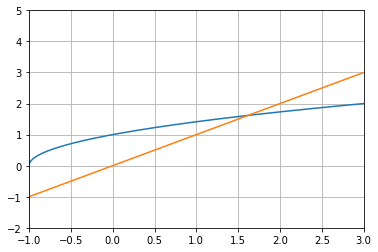

+-----+--------------------+--------------------+------------------------+
| Itr |         Pn         |        Pn+1        |      |Pn+1 - Pn|       |
+-----+--------------------+--------------------+------------------------+
|  1  |        0.5         | 0.979425538604203  |   0.479425538604203    |
|  2  | 0.979425538604203  | 1.330177245525354  |   0.350751706921151    |
|  3  | 1.330177245525354  | 1.4711906314794114 |  0.14101338595405744   |
|  4  | 1.4711906314794114 | 1.4950434527111363 |  0.02385282123172483   |
|  5  | 1.4950434527111363 | 1.4971321228698637 | 0.0020886701587274903  |
|  6  | 1.4971321228698637 | 1.4972880192239377 | 0.00015589635407398106 |
+-----+--------------------+--------------------+------------------------+
r = 1.4972880192239377 
f(r2) = -1.1461478567009742e-05



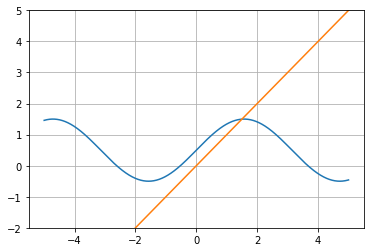

## Newton-Raphson Method
- Implement the <b>Newton's method</b> as a function and solve the following equations:
    - $𝒇(𝒙)=𝒙^𝟑−𝒙^𝟐−𝟏𝟓𝒙+𝟏$,          𝒙_𝟎=𝟒.𝟓
    - $𝒄𝒐𝒔(𝒙)=𝒙$,                      [0,2]
    - $𝒇(𝒙)=𝒙^𝟑−𝟐𝒙+𝟐$,               𝒙_𝟎=-2
- Draw the functions and check out the roots.
- Try your function with different initialization and check out the results.

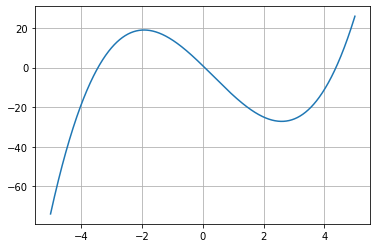

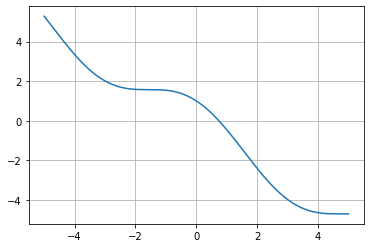

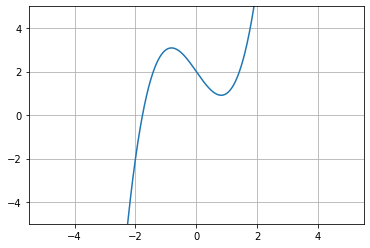

Found solution after 3 iterations.
r = 4.375753855705814 
f(r1) = 1.1410321576477145e-09

Found solution after 3 iterations.
r = 0.739085133385284 
f(r1) = -2.847205804457076e-10

Found solution after 4 iterations.
r = -1.7692923542386998 
f(r1) = -5.053735208093713e-13


### Use scipy.optimize.fsolve() to solve the above equations and compare your results.

In [1]:
from scipy.optimize import fsolve

array([4.37575386])

array([0.73908513])

array([-1.76929235])